# Setup

In [0]:
# Install requirements
! pip install -r requirements.txt
! pip show tensorflow  # make sure it's < v2.0

# Manually import these files, then unzip
!unzip labels_csv_to_xml.zip
!unzip dataset.zip

# !rm -rf dataset  # remove previous data if needed

In [11]:
import os.path
import os
import shutil
import random
from imageai.Detection.Custom import DetectionModelTrainer
from imageai.Detection.Custom import CustomObjectDetection

images_path = 'images/'
labels_path = 'labels_csv_to_xml/'  # 'labels_path'
train_path = 'dataset/train/'
validation_path = 'dataset/validation/'

# Checking to make sure all files copied
print('labels_csv_to_xml: ', len(os.listdir('./labels_csv_to_xml')))
print('dataset/train/images: ', len(os.listdir('./dataset/train/images')))
print('dataset/validation/images: ', len(os.listdir('./dataset/validation/images')))

labels_csv_to_xml:  435
dataset/train/images:  346
dataset/validation/images:  88


# Train model

In [14]:
# Setup model training
trainer = DetectionModelTrainer()
trainer.setModelTypeAsYOLOv3()
trainer.setDataDirectory(data_directory="dataset/")
trainer.setTrainConfig(object_names_array=["corn", "weed"],
                       batch_size=3,
                       num_experiments=5,
                       train_from_pretrained_model="pretrained-yolov3.h5")

Generating anchor boxes for training images and annotation...
Average IOU for 9 anchors: 0.75
Anchor Boxes generated.
Detection configuration saved in  dataset/json/detection_config.json


In [15]:
# Train model
trainer.trainModel()

Training on: 	['corn', 'weed']
Training with Batch Size:  3
Number of Experiments:  5
Training with transfer learning from pretrained Model


/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:998: UserWarning: `epsilon` argument is deprecated and will be removed, use `min_delta` instead.
  warnings.warn('`epsilon` argument is deprecated and '


Epoch 1/5
928/928 [==============================] - 756s 815ms/step - loss: 28.2967 - yolo_layer_7_loss: 4.2574 - yolo_layer_8_loss: 8.0314 - yolo_layer_9_loss: 16.0080 - val_loss: 20.9448 - val_yolo_layer_7_loss: 3.2519 - val_yolo_layer_8_loss: 6.1208 - val_yolo_layer_9_loss: 10.4842

Epoch 2/5
928/928 [==============================] - 689s 742ms/step - loss: 18.4430 - yolo_layer_7_loss: 2.9451 - yolo_layer_8_loss: 5.8154 - yolo_layer_9_loss: 9.6826 - val_loss: 22.0091 - val_yolo_layer_7_loss: 3.3812 - val_yolo_layer_8_loss: 5.7912 - val_yolo_layer_9_loss: 9.1720
Epoch 3/5
928/928 [==============================] - 688s 741ms/step - loss: 16.5192 - yolo_layer_7_loss: 2.5132 - yolo_layer_8_loss: 5.1904 - yolo_layer_9_loss: 8.8157 - val_loss: 21.2196 - val_yolo_layer_7_loss: 3.3344 - val_yolo_layer_8_loss: 5.8145 - val_yolo_layer_9_loss: 8.5137
Epoch 4/5
928/928 [==============================] - 687s 741ms/step - loss: 15.6912 - yolo_layer_7_loss: 2.4996 - yolo_layer_8_loss: 5.0368 -

In [17]:
trainer = DetectionModelTrainer()
trainer.setModelTypeAsYOLOv3()
trainer.setDataDirectory(data_directory="dataset")
metrics = trainer.evaluateModel(model_path="dataset/models", json_path="dataset/json/detection_config.json", iou_threshold=0.5, object_threshold=0.9, nms_threshold=0.5)

Starting Model evaluation....
skipping the evaluation of dataset/models/detection_model-ex-001--loss-0022.524.h5 because following exception occurred: Unable to create group (no write intent on file)


/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


Model File:  dataset/models/detection_model-ex-001--loss-0028.297.h5 

Using IoU :  0.5
Using Object Threshold :  0.9
Using Non-Maximum Suppression :  0.5
corn: 0.4699
weed: 0.0171
mAP: 0.2435
Model File:  dataset/models/detection_model-ex-002--loss-0018.443.h5 

Using IoU :  0.5
Using Object Threshold :  0.9
Using Non-Maximum Suppression :  0.5
corn: 0.5938
weed: 0.1646
mAP: 0.3792
Model File:  dataset/models/detection_model-ex-003--loss-0016.519.h5 

Using IoU :  0.5
Using Object Threshold :  0.9
Using Non-Maximum Suppression :  0.5
corn: 0.6183
weed: 0.3573
mAP: 0.4878
Model File:  dataset/models/detection_model-ex-004--loss-0015.691.h5 

Using IoU :  0.5
Using Object Threshold :  0.9
Using Non-Maximum Suppression :  0.5
corn: 0.7128
weed: 0.3615
mAP: 0.5372
Model File:  dataset/models/detection_model-ex-005--loss-0014.777.h5 

Using IoU :  0.5
Using Object Threshold :  0.9
Using Non-Maximum Suppression :  0.5
corn: 0.6410
weed: 0.4760
mAP: 0.5585


In [0]:
detector = CustomObjectDetection()
detector.setModelTypeAsYOLOv3()
detector.setModelPath("dataset/models/detection_model-ex-005--loss-0014.777.h5")
detector.setJsonPath("dataset/json/detection_config.json")
detector.loadModel()
detections = detector.detectObjectsFromImage(input_image="test.jpg", output_image_path="ima-detected.jpg", minimum_percentage_probability=50)

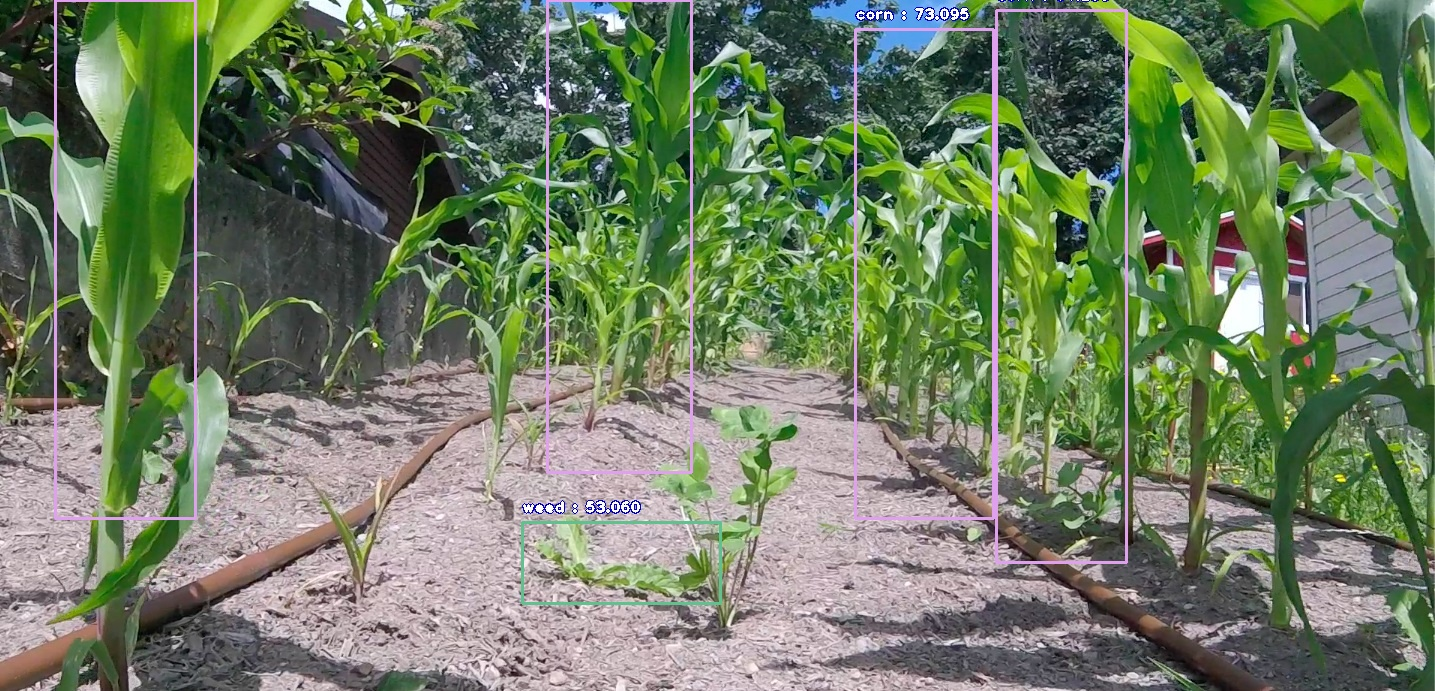

In [30]:
from IPython.display import Image
Image('ima-detected.jpg')